# Image processing

In [1]:
import sys
sys.path.append('../')

from MRIsegm.utils import get_slice, get_rois
from MRIsegm.processing import explore_histogram, denoise_nlm, compare_denoised_histo,denoise_slice, manual_tresh, adaptive_threshold, otsu_threshold, show_gabor_filter, k_means_clustering

import numpy as np
import cv2
from ipywidgets import interact, fixed, IntRangeSlider
from random import choice

## Loading data 

In [2]:
src = '/Users/giuseppefilitto/Pazienti_anonym_sorted/'
patience = 'BO11/'
dir_path =  src + patience + 'T2AX'

slice = get_slice(dir_path=dir_path) 

roi_path = src + patience + 'T2ROI'

positions, xs, ys = get_rois(roi_path=roi_path)  

## Histogram

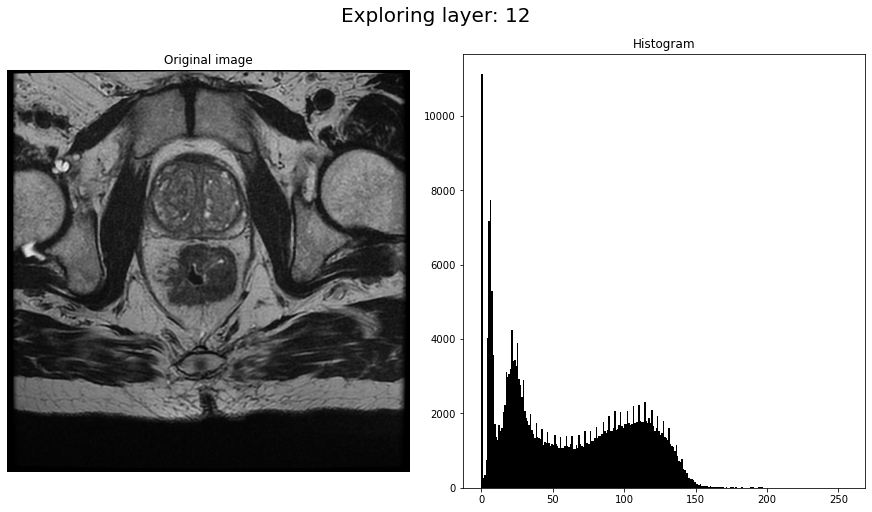

In [3]:
layer = choice(positions)

explore_histogram(slice=slice, layer=layer)

## Denoising 

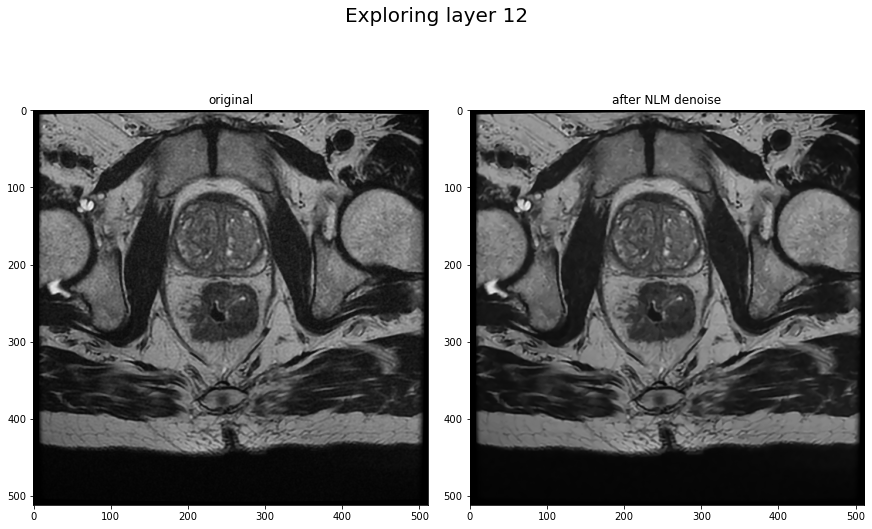

In [4]:
alpha = 5
denoise_nlm(slice=slice, layer=layer, alpha=alpha, show=True)

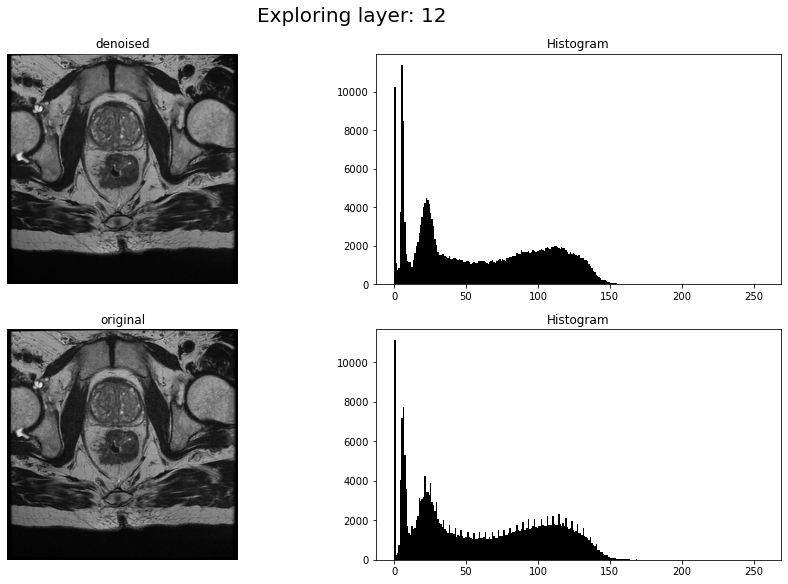

In [5]:
compare_denoised_histo(slice=slice, layer=layer, alpha=alpha)

## Thresholding

In [6]:
slice = denoise_slice(slice=slice, alpha=alpha, patch_size=5, patch_distance=3)

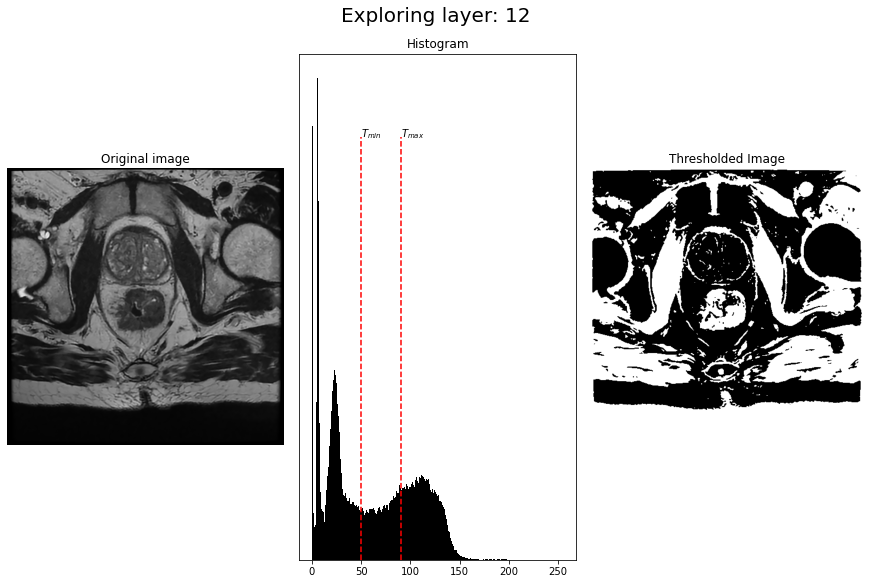

In [7]:
manual_tresh(slice=slice, layer=layer, threshold=(50,90))

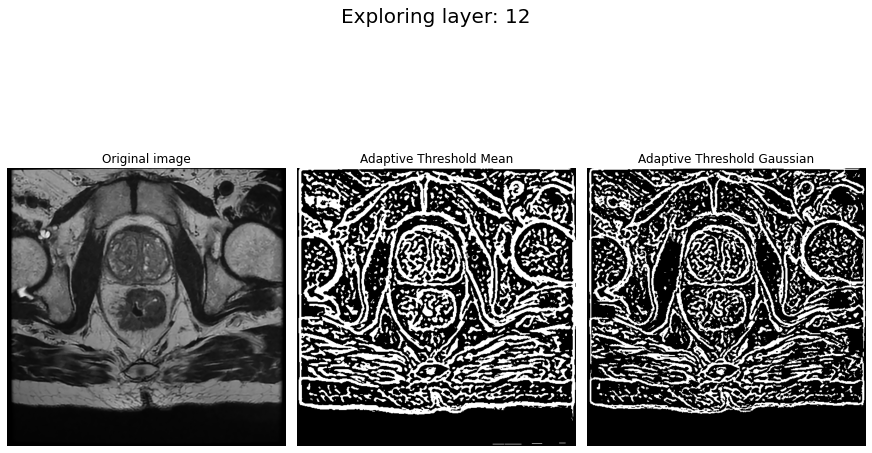

In [8]:
adaptive_threshold(slice=slice, layer=layer)


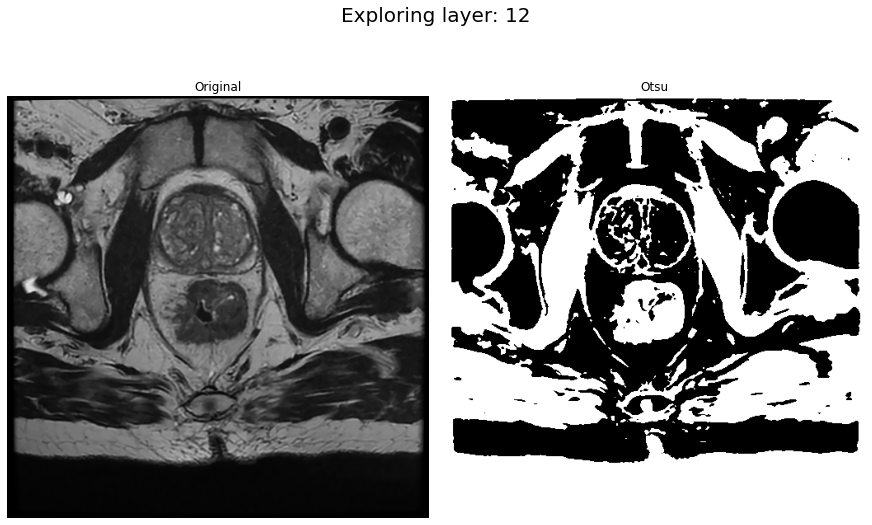

In [9]:
otsu_threshold(slice=slice, layer=layer)

## Gabor

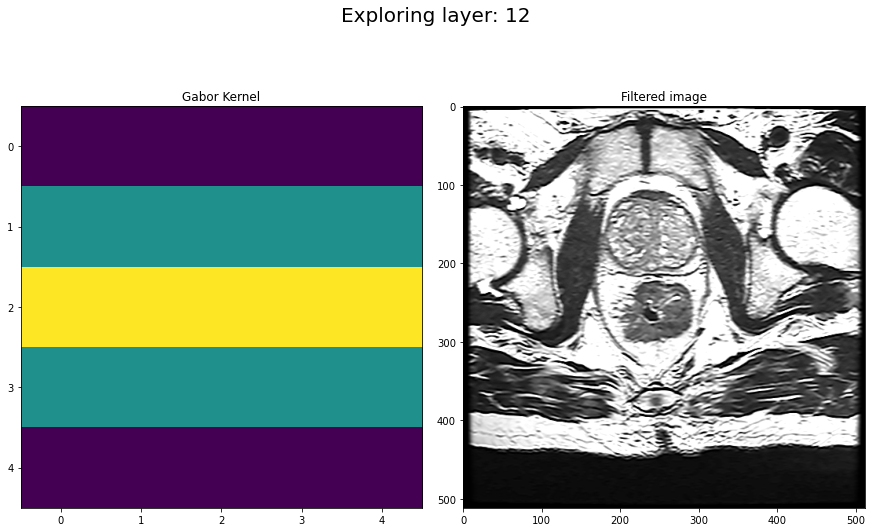

In [10]:
show_gabor_filter(slice=slice, layer=layer, ksize=5, sigma=2, theta=np.pi/2, lamb=2*np.pi/5, gamma=0.1, psi=0)

## K-Means

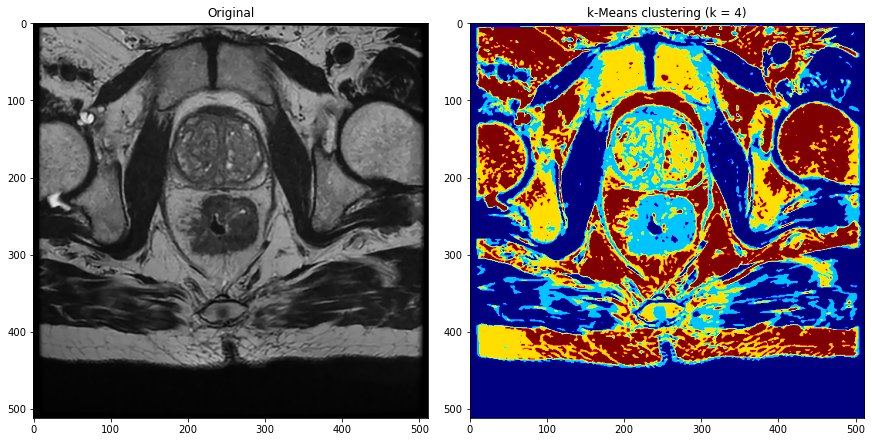

In [11]:
img = slice[layer, : ,:]

# criteria

max_iter = 10
epsilon = 1.0
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)


k_means_clustering(img=img, k=4, attemps=10, criteria=criteria, show=True)        

# Interactive 

In [12]:
slice = get_slice(dir_path=dir_path)

## Histogram

In [13]:
interact(explore_histogram, slice=fixed(slice), layer=(0, slice.shape[0]-1))


interactive(children=(IntSlider(value=14, description='layer', max=29), Output()), _dom_classes=('widget-inter…

<function MRIsegm.processing.explore_histogram(slice, layer)>

## Denoising

In [14]:
interact(denoise_nlm, slice=fixed(slice), layer=(0, slice.shape[0]-1), alpha=(0, 15), show=True)


interactive(children=(IntSlider(value=14, description='layer', max=29), IntSlider(value=7, description='alpha'…

<function MRIsegm.processing.denoise_nlm(slice, layer, alpha, show=False)>

In [15]:
interact(compare_denoised_histo, slice=fixed(slice), layer=(0, slice.shape[0]-1), alpha=(0, 15))

interactive(children=(IntSlider(value=14, description='layer', max=29), IntSlider(value=7, description='alpha'…

<function MRIsegm.processing.compare_denoised_histo(slice, layer, alpha)>

#### using only denoised slice

In [16]:
slice = denoise_slice(slice=slice, alpha=5, patch_size=5, patch_distance=3)

## Threshold

In [17]:
interact(manual_tresh, slice=fixed(slice), layer=(0, slice.shape[0]-1), threshold=IntRangeSlider(value=[63,120], min=0, max=255, step=1, description='Threshold:'))


interactive(children=(IntSlider(value=14, description='layer', max=29), IntRangeSlider(value=(63, 120), descri…

<function MRIsegm.processing.manual_tresh(slice, layer, threshold)>

###  Adaptive threshold

In [18]:
interact(adaptive_threshold, slice=fixed(slice), layer=(0, slice.shape[0]-1))


interactive(children=(IntSlider(value=14, description='layer', max=29), Output()), _dom_classes=('widget-inter…

<function MRIsegm.processing.adaptive_threshold(slice, layer)>

### Otsu

In [19]:
interact(otsu_threshold, slice=fixed(slice), layer=(0, slice.shape[0]-1))

interactive(children=(IntSlider(value=14, description='layer', max=29), Output()), _dom_classes=('widget-inter…

<function MRIsegm.processing.otsu_threshold(slice, layer)>

### Gabor

In [20]:
interact(show_gabor_filter, slice=fixed(slice), layer=(0, slice.shape[0]-1), ksize=(0, 50), sigma=(0,20), theta=(0, 4*np.pi), lamb=(0, 4*np.pi), gamma=(0, 5, 0.1), psi=(0, 5, 0.1))



interactive(children=(IntSlider(value=14, description='layer', max=29), IntSlider(value=25, description='ksize…

<function MRIsegm.processing.show_gabor_filter(slice, layer, ksize, sigma, theta, lamb, gamma, psi)>